In [5]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
os.listdir('C:/Users/79295/Desktop/GITHUB/Analytical-practice/datasets/')

['2_bookings.csv',
 '3_companies.csv',
 '3_logs.csv',
 '3_taxi_peru.csv',
 '3_user_data.csv',
 'childrens_by_hotels.csv',
 'lesson_3_data.csv',
 'taxi.csv']

#### Сохраните данные в переменную taxi, разделитель — ;.

#### Затем приведите столбцы start_at, end_at, arrived_at к формату даты, используя pd.to_datetime(). Отфильтруйте данные и оставьте наблюдения со статусом заказа "asap" и "reserved" (start_type).

In [9]:
taxi = pd.read_csv('C:/Users/79295/Desktop/GITHUB/Analytical-practice/datasets/3_taxi_peru.csv', sep=';')

In [11]:
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaN,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaN,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaN,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


In [12]:
taxi.dtypes

journey_id           object
user_id              object
driver_id            object
taxi_id              object
icon                 object
start_type           object
start_at             object
start_lat            object
start_lon            object
end_at               object
end_lat              object
end_lon              object
end_state            object
driver_start_lat     object
driver_start_lon     object
arrived_at           object
source               object
driver_score        float64
rider_score         float64
dtype: object

In [13]:
taxi['start_at'] = pd.to_datetime(taxi['start_at'])
taxi['end_at'] = pd.to_datetime(taxi['end_at'])
taxi['arrived_at'] = pd.to_datetime(taxi['arrived_at'])

In [14]:
taxi.dtypes

journey_id                  object
user_id                     object
driver_id                   object
taxi_id                     object
icon                        object
start_type                  object
start_at            datetime64[ns]
start_lat                   object
start_lon                   object
end_at              datetime64[ns]
end_lat                     object
end_lon                     object
end_state                   object
driver_start_lat            object
driver_start_lon            object
arrived_at          datetime64[ns]
source                      object
driver_score               float64
rider_score                float64
dtype: object

In [15]:
taxi.query('start_type == "reserved" or start_type =="asap"')

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23106,4a18ea5737ce0ffecaf20b305a0e2c86,8998bb370b5f0cec43a373adebba0c72,d665fb9f75ef5d9cd0fd89479380ba78,16cbe35db7fff70fbc8251b4cda9fdc9,executive,reserved,2010-07-31 13:15:00,"-12,08974075","-77,04699707",2010-07-31 13:27:00,"-12,08352661","-77,05044556",drop off,"-12,08973527","-77,04787016",2010-07-31 13:15:00,iPhone,5.0,5.0
23107,f1e4317f2c17991dd90d1cd17ae0d399,5f8a6ffef0ea5df78a8ee890267b60ec,17c21284245ff240c7212732991c2373,716a697375634f32a06d692b0448f13d,executive,asap,2010-10-02 05:26:00,"-12,09253011","-77,02875271",2010-10-02 05:56:00,"-12,07776001","-77,05623798",drop off,"-12,10639693","-77,04028948",2010-10-02 05:39:00,Android,NaN,5.0
23108,1e44c0fd0a266c3719ff30410b257bce,c0ffb6f6cd801004dd8609c12277c2d1,4851ee4c867c9b49b909c1adb76c31e9,4851ee4c867c9b49b909c1adb76c538e,executive,asap,2010-09-21 09:56:00,"-12,1275637","-77,02642288",2010-09-21 10:18:00,"-12,10529838","-77,04735249",drop off,"-12,12605017","-77,01882491",2010-09-21 10:05:00,Android,0.0,0.0
23109,7073883383b89ad289e864022150cdd7,c0ffb6f6cd801004dd8609c12277c2d1,56f59b58bcbbd1cdabc3652e713134c2,924d4f0e7554566623e8ebb3904a7b0c,executive,reserved,2010-04-29 04:30:00,"-12,019468","-77,1077669",2010-04-29 05:11:00,"-12,09909987","-77,03475013",drop off,"-12,0710933","-77,09855131",2010-04-29 04:23:00,Android,NaN,5.0


 - #### Создайте колонку wait_time, в которой будет храниться разница между временем подачи машины (arrived_at) и временем заказа (start_at) в минутах.

 - #### Чтобы сконвертировать полученный результат в минуты, можно использовать метод .astype('timedelta64[m]').

In [16]:
taxi['wait_time'] = taxi['arrived_at'] - taxi['start_at']

In [22]:
taxi['wait_time'] = taxi['wait_time'].astype('timedelta64[m]')

In [23]:
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0,18.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0,-5.0


#### Посмотрим, какие водители опаздывали на заказы к определенному времени (start_type == 'reserved'). Опозданием считается время ожидания wait_time > 0.0.

#### Сгруппируйте отфильтрованные данные по driver_id и в качестве ответа укажите id водителя, который опоздал на заказ интересующего нас типа наибольшее число раз

In [61]:
wait_count_by_drivers = taxi.query('start_type == "reserved" and wait_time > 0.0') \
    .groupby('driver_id', as_index=False) \
    .agg({'journey_id':'count'}) \
    .rename(columns={"journey_id":"wait_count"}) \
    .sort_values('wait_count', ascending=False) 
wait_count_by_drivers    
    

,driver_id,wait_count
24,406921adcca37705ef527b4246c0cfea,67
86,d665fb9f75ef5d9cd0fd89479380ba78,59
93,ec84a73745199ff840ecafcb924383ad,57
29,56f59b58bcbbd1cdabc3652e713134c2,51
77,c814db2127582cf95dea1f74f43127c2,45
...,...,...
88,d7bf644eb441cda6127f91addebb85c4,1
71,b68895736389f2949faa8c73555b81ac,1
51,8cb98e46b27af1e6fca8768a2a6329f3,1
16,389bfa333ba8fa7281dd5f0e1b57c0c1,1


In [47]:
taxi.query('start_type == "reserved" and wait_time > 0.0') \
    .groupby('driver_id', as_index=False) \
    .agg({'journey_id':'count'}) \
    .rename(columns={"journey_id":"wait_count"}) \
    .sort_values('wait_count', ascending=False) \
    .query('wait_count == 67') \
    .driver_id

24    406921adcca37705ef527b4246c0cfea
Name: driver_id, dtype: object

In [54]:
# Более красивое и лаконичное решенеие:

In [53]:
taxi.query('start_type == "reserved" and wait_time > 0.0').driver_id.value_counts().idxmax()

'406921adcca37705ef527b4246c0cfea'

In [139]:
# Почему этот вожитеь так часто опаздывает? 
# Гипотеза № 1. У него больше всего поездок, поэтому и кол-во опазданий самое большое.
# Выведем ТОП-5 водителей по числу поездок c подачей к указанному времени:

In [140]:
max_journey_drivers = taxi \
    .query('start_type == "reserved"') \
    .groupby('driver_id', as_index=False) \
    .agg({"journey_id":"count"}) \
    .rename(columns={"journey_id":"journey_count"}).sort_values('journey_count', ascending=False).head(5)

max_journey_drivers

,driver_id,journey_count
119,d665fb9f75ef5d9cd0fd89479380ba78,579
109,c814db2127582cf95dea1f74f43127c2,385
34,406921adcca37705ef527b4246c0cfea,363
143,ff5c924e0b630fd7c019a4234059fdf4,359
33,406921adcca37705ef527b4246bbbff5,346


In [84]:
# Наш водитель действительно в топе, но не на первом месте, а на 3, значит с кол-вом поездок это не связано.

In [85]:
# Ради интереса посчитаем кол-во опазданий у водителей из ТОП-5 по числу поездок:

In [141]:
top5_drivers_wait = max_journey_drivers.merge(wait_count_by_drivers, on = 'driver_id' )
top5_drivers_wait


,driver_id,journey_count,wait_count
0,d665fb9f75ef5d9cd0fd89479380ba78,579,59
1,c814db2127582cf95dea1f74f43127c2,385,45
2,406921adcca37705ef527b4246c0cfea,363,67
3,ff5c924e0b630fd7c019a4234059fdf4,359,42
4,406921adcca37705ef527b4246bbbff5,346,26


In [142]:
# Кол-во опазданий у водителей из ТОП-5 по числу поездок:

In [143]:
top5_drivers_wait['wait_rate'] = (top5_drivers_wait['wait_count'] / top5_drivers_wait['journey_count'] * 100).round(2)
top5_drivers_wait

,driver_id,journey_count,wait_count,wait_rate
0,d665fb9f75ef5d9cd0fd89479380ba78,579,59,10.19
1,c814db2127582cf95dea1f74f43127c2,385,45,11.69
2,406921adcca37705ef527b4246c0cfea,363,67,18.46
3,ff5c924e0b630fd7c019a4234059fdf4,359,42,11.70
4,406921adcca37705ef527b4246bbbff5,346,26,7.51


In [101]:
# Гипотеза № 2. У него больше всего средняя продолжительностьпоездок, поэтому сложнее рассчитать время прибытия.
# Выведем ТОП-10 водителей по продолжитеьности поездок:

In [144]:
taxi['journey_time'] = (taxi['end_at'] - taxi['arrived_at']).astype('timedelta64[m]')

In [145]:
avg_journey_time = taxi[['driver_id','journey_time']] \
    .groupby('driver_id',as_index=False) \
    .agg({"journey_time":"mean"}) \
    .sort_values("journey_time", ascending=False).head(10)
avg_journey_time

,driver_id,journey_time
22,2b9be9ff113177942788e7d6e8554a15,130.666667
112,b4f2c132de1648fecf41bb1651525c91,84.666667
69,660b608a136931aa5ab0d31556ede173,84.333333
158,f8cd07f929f6884cd5fea893f4da3461,78.000000
3,0fd4a08189ac948f6beaa2d3145c81b6,77.250000
105,ae06c34243f741e203e97c48eb632cb6,74.033333
7,1238e44402a93366489cbff9884d463c,69.420000
32,3a9ca0965227dc470f30145e41e898d1,69.387755
89,8d6e3838b34e9c7181ac358dbc30bfe1,68.520000
91,8ff94ac5183d99dc41b042ad5cb1e655,65.487805


In [129]:
# Наш водитель не входит в десятку по средней продолжительности поездки

In [146]:
# Дополним для анализа нашу табличку данными о количестве опазданий и количестве поездок 
# для водителей из ТОП-10 по средней продолжительности поездки

In [147]:
custom_df = avg_journey_time.merge(wait_count_by_drivers, on = 'driver_id') \
                .merge(taxi.groupby('driver_id', as_index=False) \
                       .agg({"journey_id":"count"}) \
                        .rename(columns={"journey_id":"journey_count"}), on ='driver_id')
custom_df

,driver_id,journey_time,wait_count,journey_count
0,b4f2c132de1648fecf41bb1651525c91,84.666667,4,16
1,f8cd07f929f6884cd5fea893f4da3461,78.000000,1,5
2,ae06c34243f741e203e97c48eb632cb6,74.033333,7,30
3,1238e44402a93366489cbff9884d463c,69.420000,4,54
4,3a9ca0965227dc470f30145e41e898d1,69.387755,4,51
5,8d6e3838b34e9c7181ac358dbc30bfe1,68.520000,6,26
6,8ff94ac5183d99dc41b042ad5cb1e655,65.487805,20,42


In [154]:
custom_df.journey_count.describe()

count     7.000000
mean     32.000000
std      18.119971
min       5.000000
25%      21.000000
50%      30.000000
75%      46.500000
max      54.000000
Name: journey_count, dtype: float64

In [131]:
# Откинем тех, у кого меньше 32 поездок:

In [155]:
custom_df.query('journey_count >32')

,driver_id,journey_time,wait_count,journey_count
3,1238e44402a93366489cbff9884d463c,69.420000,4,54
4,3a9ca0965227dc470f30145e41e898d1,69.387755,4,51
6,8ff94ac5183d99dc41b042ad5cb1e655,65.487805,20,42


In [156]:
# Делаем вывод, что от средней продолжительности поездок кол-во опазаданий не зависит

- #### Добавьте столбец month, где будет храниться номер месяца, в котором был сделан заказ (start_at), и столбец weekday – название дня недели.



.dt.strftime('%A') – извлечь день недели в формате названия

In [158]:
taxi['month'] = pd.DatetimeIndex(taxi['start_at']).month

In [160]:
taxi['weekday'] = taxi['start_at'].dt.strftime('%A')

In [162]:
taxi[['start_at', 'month', 'weekday']].head()

,start_at,month,weekday
0,2010-11-16 16:44:00,11,Tuesday
1,2010-06-01 00:34:00,6,Tuesday
2,2010-05-31 05:01:00,5,Monday
3,2010-06-01 00:29:00,6,Tuesday
4,2010-09-11 23:55:00,9,Saturday


#### Постройте график числа заказов по месяцам (month). Подумайте, с чем может быть связана полученная картина.

- Вопрос: в каком летнем месяце было сделано наименьшее число заказов?

In [175]:
month_journey = taxi[['journey_id', 'month']] \
    .groupby('month', as_index=False) \
    .agg({"journey_id":"count"}) \
    .rename(columns={"journey_id":"count_journey"})
month_journey 

,month,count_journey
0,1,575
1,2,770
2,3,986
3,4,1448
4,5,1585
5,6,1939
6,7,1516
7,8,2120
8,9,2598
9,10,3240


<AxesSubplot:xlabel='month', ylabel='count'>

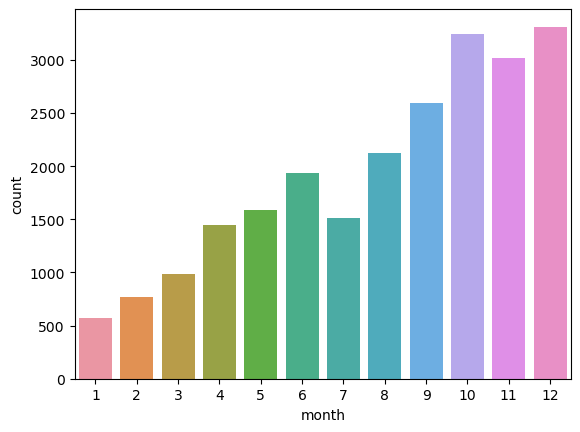

In [183]:
sns.countplot(data = taxi, x = 'month')

In [188]:
# Меньше всего заказов летом было а июле

#### А теперь – график по дням недели (weekday). Задать порядок столбиков на графике можно с помощью аргумента order, которому нужно передать список названий в нужном порядке. Например:

- sns.countplot(data['column'], order=['One', 'Two', 'Three'])

-Вопрос: в какой день недели суммарно поступает меньше всего заказов? Укажите то название, которое написано в самом датафрейме.

<AxesSubplot:xlabel='weekday', ylabel='count'>

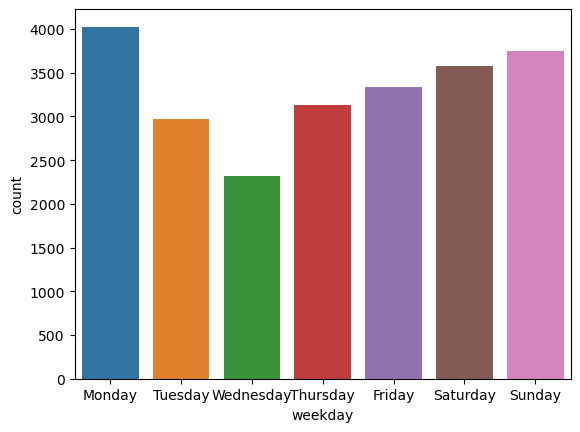

In [194]:
sns.countplot(data = taxi, x = 'weekday', order=['Monday','Tuesday','Wednesday','Thursday', 'Friday','Saturday','Sunday'])

In [195]:
# Больше всего заказов поступает в Понедельник - день тяжелый

In [201]:
#Также мы можем посмотреть на несколько простых метрик, показывающих число уникальных пользователей за определённый период:

# MAU (monthly active users) – число уникальных пользователей за месяц
# Активные пользователи – те, кто воспользовался приложением и сделал хотя бы один заказ за выбранный промежуток времени.
# Постройте график MAU
# Могут пригодиться:

# groupby – группировка
# nunique – число уникальных значений
# plot.line – линейная диаграмма

In [220]:
mau_df=taxi.groupby('month').user_id.nunique()
mau_df

month
1     102
2     111
3     163
4     254
5     275
6     309
7     318
8     377
9     416
10    437
11    504
12    569
Name: user_id, dtype: int64

<AxesSubplot:xlabel='month'>

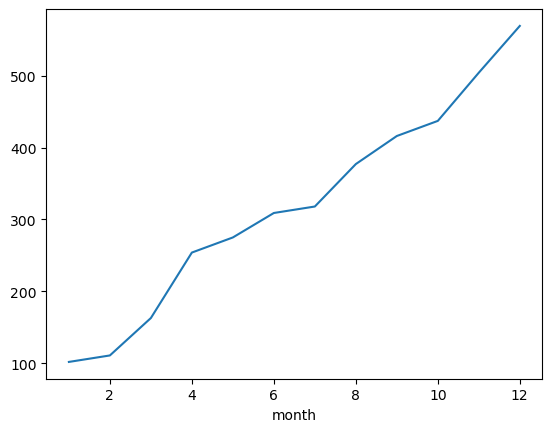

In [223]:
mau_df.plot.line()